# Modeling: Linear Regression for infections and beds

Here I'll try to create a model that predicts new infections from vaccinations.

**Spoiler:** The model won't work and it has a very low score. Fortunately, this is not the purpose of this project. Now, you can go to the next notebook to see the clustering model.

In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

References:

* https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [3]:
#Machine Learning libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

In [4]:
df_unified = pd.read_csv('/work/covid-19-EC-provinces/data/interim/df_unified.csv')

In [5]:
df_unified

,nuevas,dosis_total_diff,primera_dosis_diff,segunda_dosis_diff,refuerzo_diff,(MSP) UCI Porcentaje Ocupadas,(RPIS) UCI Porcentaje Ocupadas,(RPC) UCI Porcentaje Ocupadas
0,23,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,5,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,11,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,21,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,53,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
639,267,31764.0,6456.0,16342.0,8966.0,53.0,76.0,22.0
640,131,111430.0,17088.0,70415.0,23927.0,55.0,76.0,22.0
641,588,102176.0,17897.0,63582.0,20697.0,55.0,74.0,25.0
642,581,115950.0,21738.0,70351.0,23861.0,52.0,76.0,22.0


In [6]:
df_unified.columns

Index(['nuevas', 'dosis_total_diff', 'primera_dosis_diff',
       'segunda_dosis_diff', 'refuerzo_diff', '(MSP) UCI Porcentaje Ocupadas',
       '(RPIS) UCI Porcentaje Ocupadas', '(RPC) UCI Porcentaje Ocupadas'],
      dtype='object')

In [7]:
df_unified.drop(columns=['(MSP) UCI Porcentaje Ocupadas', 
'(RPIS) UCI Porcentaje Ocupadas',
'(RPC) UCI Porcentaje Ocupadas'], inplace=True)

In [8]:
sns.set_theme()

In [9]:
df_unified.shape

(644, 5)

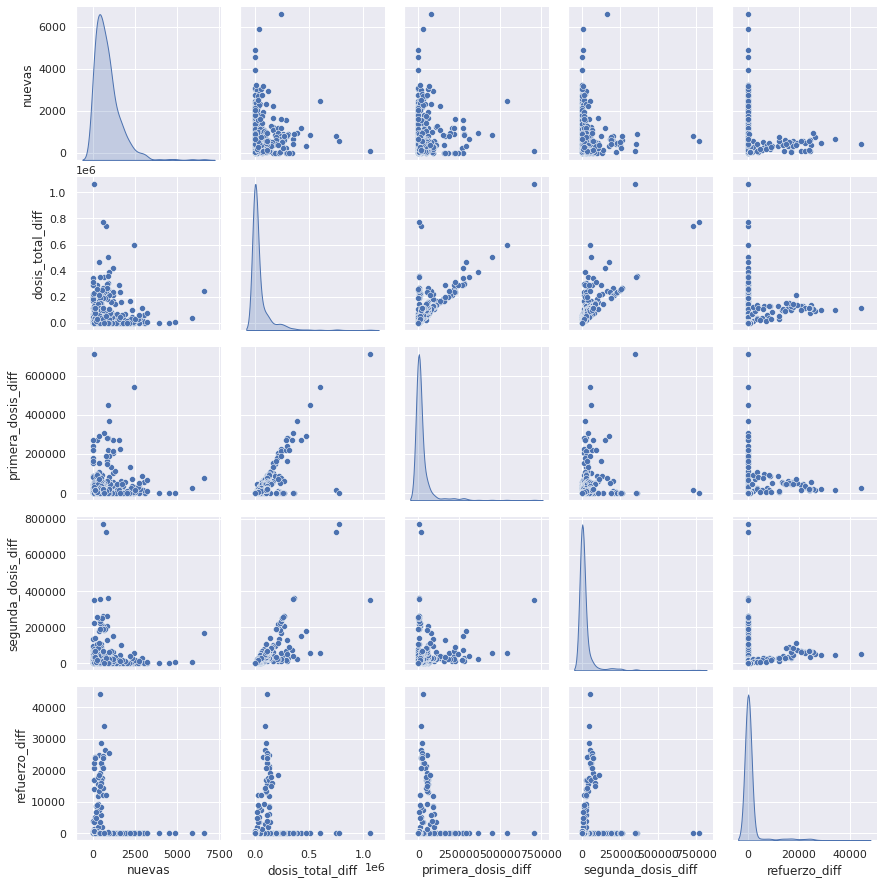

In [10]:
sns.pairplot(df_unified, diag_kind='kde')
plt.show()

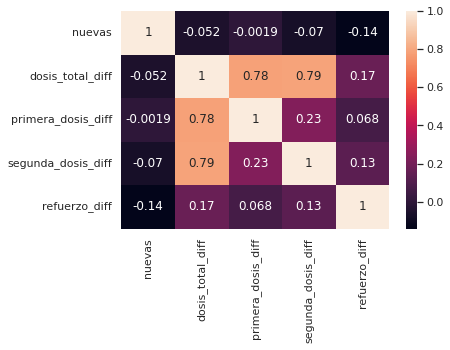

In [11]:
sns.heatmap(df_unified.corr(), annot=True)
plt.show()

## Transformation/normalization

In [12]:
#Power transformation
pt = PowerTransformer(method='yeo-johnson')
df_unified_yeo_johnson = pt.fit_transform(df_unified)


In [13]:
df_unified_yeo_johnson

array([[-1.8895636 , -0.76849712, -0.72812814, -0.74005508, -0.31407475],
       [-2.19905248, -0.76849712, -0.72812814, -0.74005508, -0.31407475],
       [-2.06455189, -0.76849712, -0.72812814, -0.74005508, -0.31407475],
       ...,
       [-0.09688561,  1.35086944,  1.36467359,  1.43503941,  3.19899064],
       [-0.10842908,  1.35945846,  1.37815765,  1.44086444,  3.19899312],
       [ 0.01260227, -0.76849712, -0.72812814, -0.74005508, -0.31407475]])

In [14]:
y = df_unified_yeo_johnson[:, 0]
x = df_unified_yeo_johnson[:, 1::]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
#Creating the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train) 

LinearRegression()

In [17]:
regressor.score(X_test, Y_test)


0.03666604500530124

Without scaling

In [18]:
yy = df_unified.iloc[:, 0].values
xx = df_unified.iloc[:, 1::].values

In [19]:
XX_train, XX_test, YY_train, YY_test = train_test_split(xx, yy, test_size=0.2, random_state=0)

In [20]:
#Creating the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train) 

LinearRegression()

In [21]:
regressor.score(XX_test, YY_test)


-1545.2997912931814

In [22]:
5

5

In [23]:
df_icu_unified = pd.read_csv('/work/covid-19-EC-provinces/data/interim/df_icu_unified.csv') 

In [24]:
df_icu_unified

,nuevas,dosis_total_diff,primera_dosis_diff,segunda_dosis_diff,refuerzo_diff,(MSP) UCI Porcentaje Ocupadas,(RPIS) UCI Porcentaje Ocupadas,(RPC) UCI Porcentaje Ocupadas
0,1034,79378.0,44241.0,35137.0,0.0,0.0,0.0,0.0
1,1619,44004.0,0.0,44004.0,0.0,0.0,0.0,0.0
2,985,105820.0,83629.0,22191.0,0.0,0.0,0.0,0.0
3,0,65789.0,43880.0,21909.0,0.0,0.0,0.0,0.0
4,507,129679.0,99222.0,30457.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
164,267,31764.0,6456.0,16342.0,8966.0,53.0,76.0,22.0
165,131,111430.0,17088.0,70415.0,23927.0,55.0,76.0,22.0
166,588,102176.0,17897.0,63582.0,20697.0,55.0,74.0,25.0
167,581,115950.0,21738.0,70351.0,23861.0,52.0,76.0,22.0


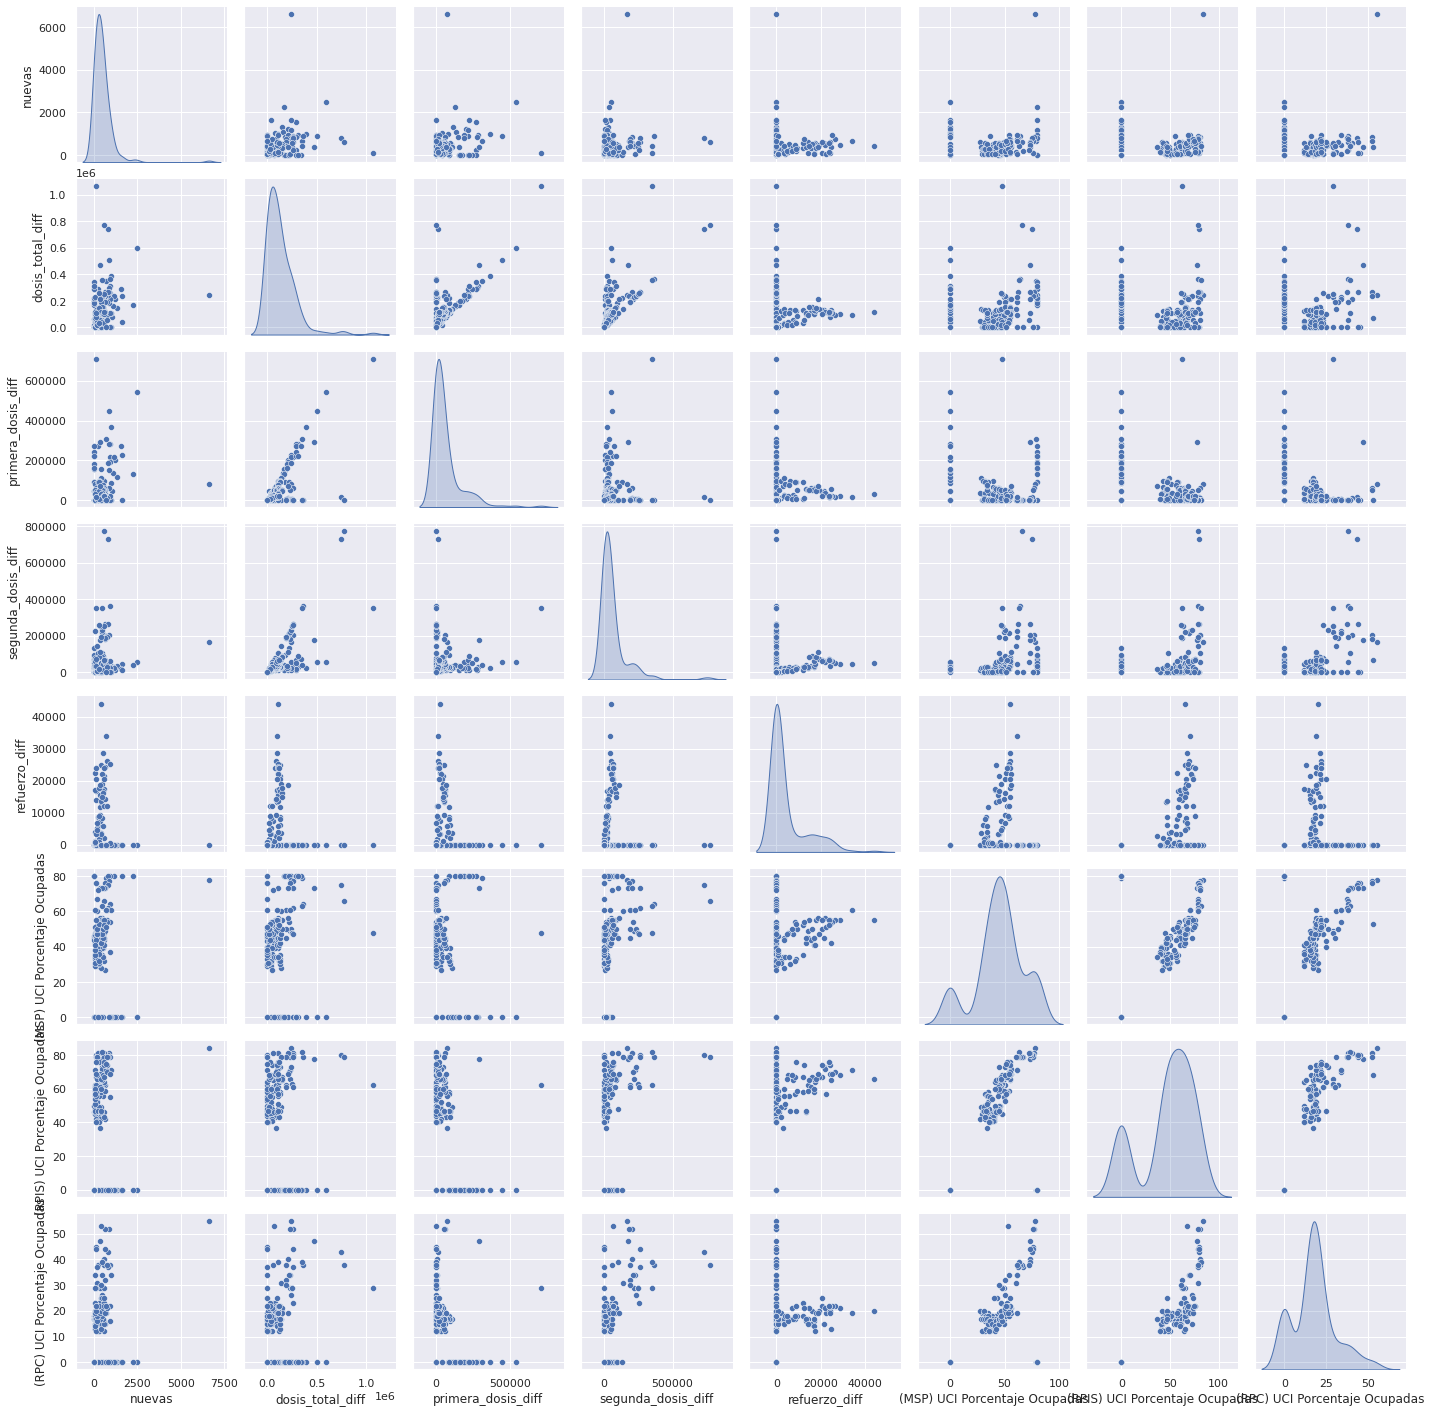

In [25]:
sns.pairplot(df_icu_unified, diag_kind='kde')
plt.show()

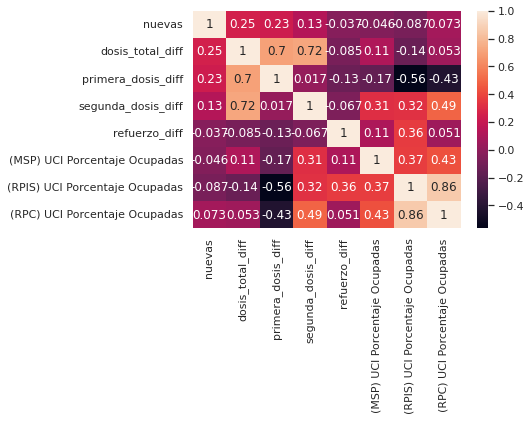

In [26]:
sns.heatmap(df_icu_unified.corr(), annot=True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7294ef23-3287-47ac-a12f-ba892bffdf3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>